In [1]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline

In [18]:
'''Load the control group and treatment group data'''
import urllib.request
import warnings
warnings.filterwarnings("ignore")
dataFrame=[]
data = urllib.request.urlopen("http://users.nber.org/~rdehejia/data/cps_controls.txt").read() 
# read  the control group data from website
data = data.decode('utf8').split("\n")

In [35]:
import re
df_list = []
for line in data: 
    column=re.split('\s+', line)
    del column[0]
    df_list.append(column)
    

In [84]:
'''Create dataFrame for control group'''
ctrls= pd.DataFrame(df_list, columns=['treat', 'age', 'educ', 'black', 'hisp', 'married', 'nodegr',
    're74', 're75', 're78'])

ctrls=ctrls[:15992]
ctrls.head(5)

,treat,age,educ,black,hisp,married,nodegr,re74,re75,re78
0,0.0000000e+000,4.5000000e+001,1.1000000e+001,0.0000000e+000,0.0000000e+000,1.0000000e+000,1.0000000e+000,2.1516670e+004,2.5243550e+004,2.5564670e+004
1,0.0000000e+000,2.1000000e+001,1.4000000e+001,0.0000000e+000,0.0000000e+000,0.0000000e+000,0.0000000e+000,3.1759710e+003,5.8525650e+003,1.3496080e+004
2,0.0000000e+000,3.8000000e+001,1.2000000e+001,0.0000000e+000,0.0000000e+000,1.0000000e+000,0.0000000e+000,2.3039020e+004,2.5130760e+004,2.5564670e+004
3,0.0000000e+000,4.8000000e+001,6.0000000e+000,0.0000000e+000,0.0000000e+000,1.0000000e+000,1.0000000e+000,2.4994370e+004,2.5243550e+004,2.5564670e+004
4,0.0000000e+000,1.8000000e+001,8.0000000e+000,0.0000000e+000,0.0000000e+000,1.0000000e+000,1.0000000e+000,1.6692950e+003,1.0727610e+004,9.8608690e+003


In [39]:
'''Load treatment group data'''
data_tr = urllib.request.urlopen("http://users.nber.org/~rdehejia/data/nswre74_treated.txt").read() 
# read the test group data from website
data_tr= data_tr.decode('utf8').split("\n")

import re
df_tr_list = []
for line in data_tr: 
    column=re.split('\s+', line)
    del column[0]
    df_tr_list.append(column)

In [85]:
'''Create dataFrame for treatment group'''
tres= pd.DataFrame(df_tr_list, columns=['treat', 'age', 'educ', 'black', 'hisp', 'married', 'nodegr',
    're74', 're75', 're78'])
tres=tres[:185]
tres.head(5)

,treat,age,educ,black,hisp,married,nodegr,re74,re75,re78
0,1.0000000e+000,3.7000000e+001,1.1000000e+001,1.0000000e+000,0.0000000e+000,1.0000000e+000,1.0000000e+000,0.0000000e+000,0.0000000e+000,9.9300460e+003
1,1.0000000e+000,2.2000000e+001,9.0000000e+000,0.0000000e+000,1.0000000e+000,0.0000000e+000,1.0000000e+000,0.0000000e+000,0.0000000e+000,3.5958940e+003
2,1.0000000e+000,3.0000000e+001,1.2000000e+001,1.0000000e+000,0.0000000e+000,0.0000000e+000,0.0000000e+000,0.0000000e+000,0.0000000e+000,2.4909450e+004
3,1.0000000e+000,2.7000000e+001,1.1000000e+001,1.0000000e+000,0.0000000e+000,0.0000000e+000,1.0000000e+000,0.0000000e+000,0.0000000e+000,7.5061460e+003
4,1.0000000e+000,3.3000000e+001,8.0000000e+000,1.0000000e+000,0.0000000e+000,0.0000000e+000,1.0000000e+000,0.0000000e+000,0.0000000e+000,2.8978990e+002


In [60]:
print(data_total.dtypes)

treat      object
age        object
educ       object
black      object
hisp       object
married    object
nodegr     object
re74       object
re75       object
re78       object
u74         int32
u75         int32
dtype: object


In [86]:
'''Aggregate Data'''
data_total=pd.concat([ctrls,tres],axis=0).convert_objects(convert_numeric=True)
data_total['u74'] = (data_total.re74 == 0).astype(np.int32)
data_total['u75'] = (data_total.re75 == 0).astype(np.int32)
data_total[['re74_k', 're75_k', 're78_k']] =data_total[['re74', 're75', 're78']] / 1000
data_total.head(100)

,treat,age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75,re74_k,re75_k,re78_k
0,0.0,45.0,11.0,0.0,0.0,1.0,1.0,21516.6700,25243.550,25564.670,0,0,21.516670,25.243550,25.564670
1,0.0,21.0,14.0,0.0,0.0,0.0,0.0,3175.9710,5852.565,13496.080,0,0,3.175971,5.852565,13.496080
2,0.0,38.0,12.0,0.0,0.0,1.0,0.0,23039.0200,25130.760,25564.670,0,0,23.039020,25.130760,25.564670
3,0.0,48.0,6.0,0.0,0.0,1.0,1.0,24994.3700,25243.550,25564.670,0,0,24.994370,25.243550,25.564670
4,0.0,18.0,8.0,0.0,0.0,1.0,1.0,1669.2950,10727.610,9860.869,0,0,1.669295,10.727610,9.860869
5,0.0,22.0,11.0,0.0,0.0,1.0,1.0,16365.7600,18449.270,25564.670,0,0,16.365760,18.449270,25.564670
6,0.0,48.0,10.0,0.0,0.0,1.0,1.0,16804.6300,16354.600,18059.300,0,0,16.804630,16.354600,18.059300
7,0.0,18.0,11.0,0.0,0.0,0.0,1.0,1144.2120,3620.032,15739.270,0,0,1.144212,3.620032,15.739270
8,0.0,48.0,9.0,0.0,0.0,1.0,1.0,25862.3200,25243.550,25564.670,0,0,25.862320,25.243550,25.564670
9,0.0,45.0,12.0,0.0,0.0,1.0,0.0,25862.3200,0.000,3924.842,0,1,25.862320,0.000000,3.924842


''

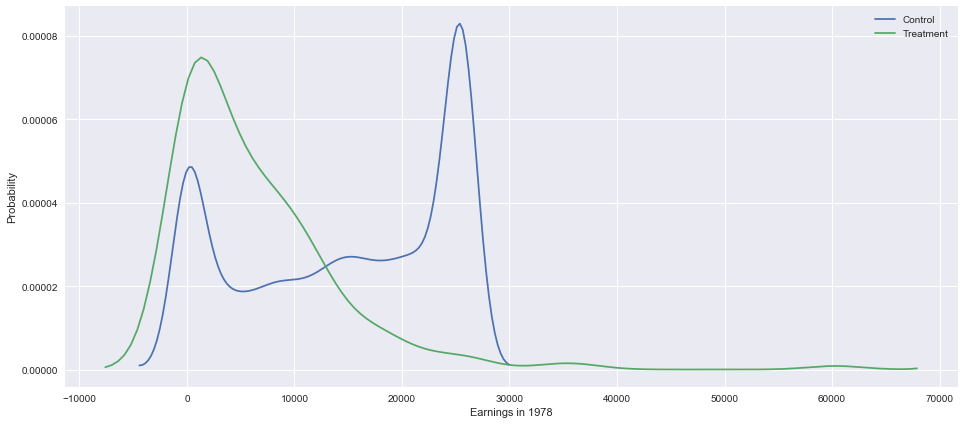

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)
'''Inspect the density of control and treament group without matching'''
sns.kdeplot(data_total[data_total.treat == 0].re78, label='Control')
sns.kdeplot(data_total[data_total.treat == 1].re78, label='Treatment')
plt.xlabel('Earnings in 1978')
plt.ylabel('Probability')
plt.legend(loc=1)
;

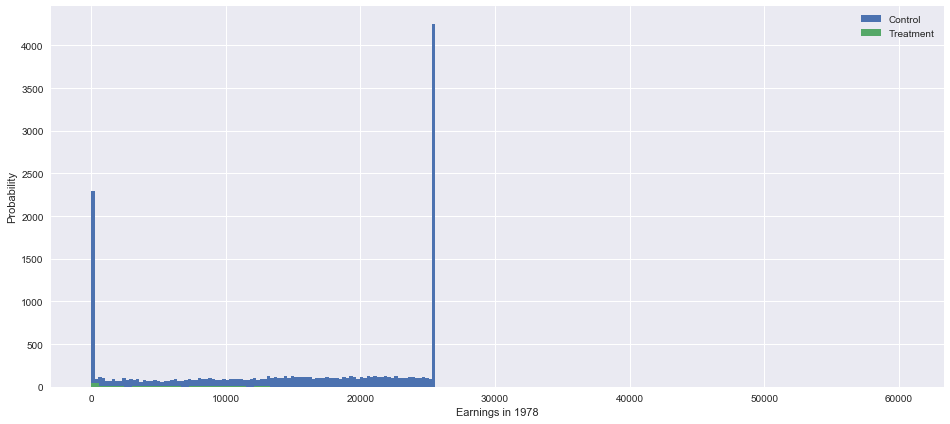

In [71]:
plt.hist(data_total[data_total.treat == 0].re78, label='Control', bins=100);
plt.hist(data_total[data_total.treat == 1].re78, label='Treatment', bins=100);
plt.xlabel('Earnings in 1978')
plt.ylabel('Probability')
plt.legend(loc=1);

In [91]:
'''Calculate the Propensity Score for all dataset'''
import statsmodels.api as sm
import statsmodels.formula.api as smf
propensity_formula = "treat ~ age + educ + black + hisp + married + nodegr + u74 + u75 + re75_k + re74_k + I(re74_k*re75_k)"
propensity_model = smf.glm(formula=propensity_formula, data=data_total, family=sm.families.Binomial()).fit()
propensity_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  treat   No. Observations:                16177
Model:                            GLM   Df Residuals:                    16165
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -473.41
Date:                Wed, 15 Nov 2017   Deviance:                       946.82
Time:                        01:02:59   Pearson chi2:                 8.10e+03
No. Iterations:                    12                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.6364      0.825     -8.045      0.000      -8.253      -5.020
age                   -0.0191      0.011     -1.788      0.074      -0.040       0.002
educ                   0.0195      0.048      0.404      0.686      -0.075       0.114
black                  4.2899      0.263     16.329      0.000       3.775       4.805
hisp                   1.8322      0.394      4.655      0.000       1.061       2.604
married               -0.9954      0.240     -4.147      0.000      -1.466      -0.525
nodegr                 0.9100      0.274      3.318      0.001       0.372       1.448
u74                    1.7318      0.280      6.178      0.000       1.182       2.281
u75                    0.3934      0.253      1.555      0.120      -0.102       0.889
re75_k                -0.0871      0.056     -1.559      0.119      -0.197       0.022
re74_k                 0.0985      0.033      2.968      0.003       0.033       0.164
I(re74_k * re75_k)    -0.0072      0.004     -1.800      0.072      -0.015       0.001
======================================================================================
"""

In [127]:
from scipy.spatial.distance import cdist
# Calculating the distance between control and treatment groups on top of propensity score
distances = cdist(control,treatment)
from scipy.optimize import linear_sum_assignment
# Matching
control_idx,treatment_idx = linear_sum_assignment(distances)


In [130]:
'''Reassign the data '''
treatment = data_total[split:].iloc[treatment_idx]
control= data_total[:split].iloc[control_idx]

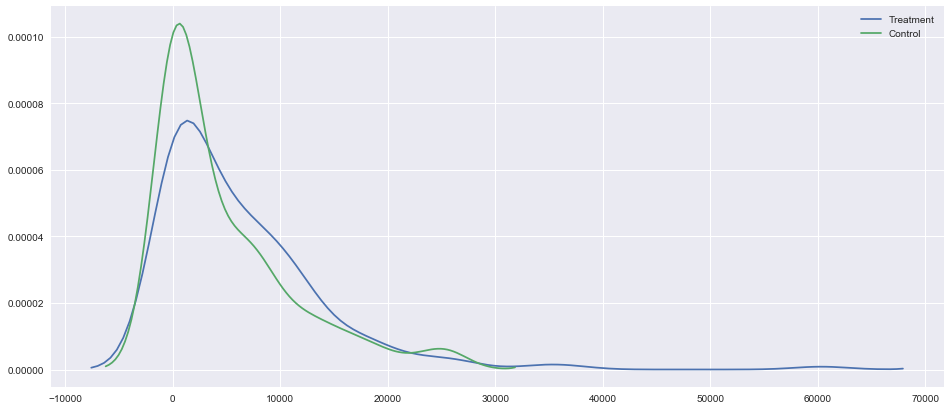

In [131]:
'''Check the results through density plot and histogram'''
sns.kdeplot(treatment.re78, label='Treatment')
sns.kdeplot(control.re78, label='Control')

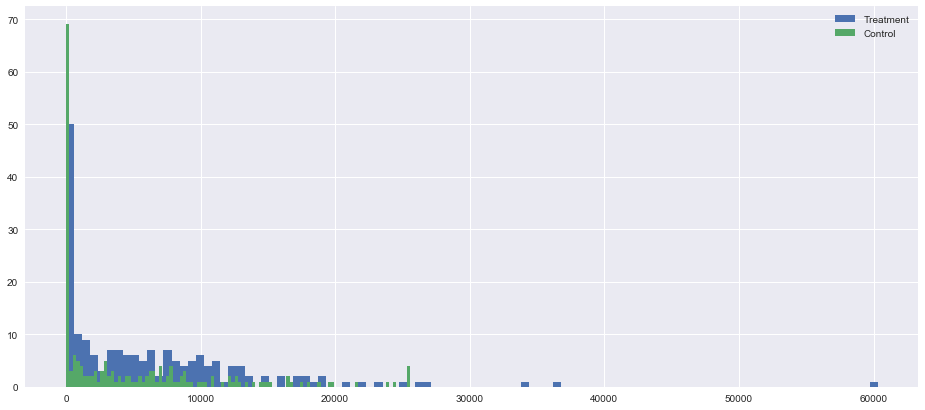

In [132]:
plt.hist(treatment.re78, label='Treatment', bins=100)
plt.hist(control.re78, label='Control', bins=100)
plt.legend();

In [135]:
'''Create the data frame'''
Matched_data= pd.concat([treatment_data,control_data], axis=0)
'''Estimate Casual Effect in R, by running glm on re78_k '''